# Debugging and visualizing data

In [1]:
import numpy as np
from rec import ContentFiltering

~~### A few details on the available debugging options~~
~~- `MEASUREMENTS` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.~~
~~- `USER_SCORES` is used to debug the `user_scores` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.~~
~~- `RECOMMENDER` is used to debug the behavior of the recommender system.~~

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
#debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
#debug_opt['USER_SCORES'] = True  # debug user preferences
#debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
#debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

### Set up recommender system
This cell contains everything needed for setup.

In [3]:
# Set up parameters
NUM_USERS = 1000
NUM_ITEMS_PER_ITER = 10  # num items presented to each user at each iteration
RUN_TIMESTEPS = 100  # num run iterations
NUM_ITEMS = round((RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# For content filtering, generate array of attributes
#for i, row in enumerate(rec_args['content']['item_representation']):
#    A = rec_args['content']['num_attributes']
#    n_indices = np.random.randint(1, A)
#    indices = np.random.randint(A, size=(n_indices))
#    row[indices] = 1
#    rec_args['content']['item_representation'][i,:] = row
# Add it to args
#rec_args['content']['item_representation'] = rec_args['content']['item_representation'].T

### Instantiate and run

In [4]:
# Create ContentFiltering instance without specifying user profiles or item attributes
default_filtering = ContentFiltering(num_users=NUM_USERS, num_items=NUM_ITEMS, 
                                     num_items_per_iter=NUM_ITEMS_PER_ITER)
# Run for time steps in RUN_TIMESTEPS
default_filtering.run(timesteps=RUN_TIMESTEPS, train_between_steps=True)

[[-0.29259426 -0.33013588 -0.28852695 ... -0.31267884 -0.29732745
  -0.31170701]
 [-0.29391727 -0.29803201 -0.2942714  ... -0.34073087 -0.28543483
  -0.31393447]
 [-0.28873755 -0.30641015 -0.28504299 ... -0.30290287 -0.28838001
  -0.30853835]
 ...
 [-0.28552818 -0.31174948 -0.27296868 ... -0.32497704 -0.31163257
  -0.29860543]
 [-0.31383264 -0.31597557 -0.29976071 ... -0.30424301 -0.29617129
  -0.34185149]
 [-0.29975288 -0.30891269 -0.27797364 ... -0.30171334 -0.28822076
  -0.32482702]]
[[-1.52833346e-02 -2.76148685e-02 -7.01434538e-03 ...  1.08505672e-02
   3.88069994e-02 -4.27994468e-02]
 [ 1.18678572e-02  2.42820423e-02 -5.01520589e-03 ... -1.01523600e-02
   2.86147565e-02  1.15119079e-04]
 [-4.08036657e-02 -1.71539489e-02 -3.71091054e-02 ... -2.60433647e-02
  -1.56527392e-02  5.51123656e-03]
 ...
 [-3.75942994e-02 -2.24932797e-02 -2.50348005e-02 ... -4.81175314e-02
  -3.89052951e-02  1.54441588e-02]
 [-3.50715749e-02  3.80067303e-02 -7.72530751e-03 ... -1.66323892e-02
  -3.95341237

### Sample results

Measurements can be easily converted into pandas DataFrame

In [5]:
measurements = list()
measurements.append(default_filtering.get_measurements())
import pandas as pd
pd.DataFrame(measurements[0], index=None)

,Timesteps,MSE
0,0,0.090513
1,1,0.000847
2,2,0.000500
3,3,0.000384
4,4,0.000326
5,5,0.000289
6,6,0.000263
7,7,0.000246
8,8,0.000233
9,9,0.000224


### Plot results

In [14]:
import matplotlib.pyplot as plt
#%matplotlib notebook

#plt.plot(np.arange(100), measurements[0]['Homogeneity'])
#plt.show()
start_slice = 0
plt.plot(measurements[0]['Timesteps'][start_slice::], measurements[0]['MSE'][start_slice::])
plt.show()

### Set up recommender system with custom values

#### You can define user profiles and item attributes:
- `user_representation` must be a `|U|x|A|` matrix, where `|U|` is the number of users and `|A|` is the number of attributes in the system.
- `item_representation` must be a `|A|x|I|` matrix, where `|A|` is the number of attributes and `|I|` is the number of items in the system.
- Note that the following constraint must hold: `item_representation.shape[0] == user_representation.shape[1]`

In [7]:
from rec import Distribution

NUM_ATTRIBUTES = NUM_ITEMS - NUM_ITEMS//(1 + np.random.randint(0, 15))

# Initialize power law distribution
d = Distribution(distr_type='powerlaw')

# Use the distribution to generate user_representation
user_representation = d.compute(a=1.16, size=(NUM_USERS, NUM_ATTRIBUTES))

# Use binomial distribution to generate item_representation distribution
item_representation = Distribution(distr_type='binom', n=5, p=0.4, size=(NUM_ATTRIBUTES, NUM_ITEMS)).compute()

# Instantiate and run recsys
filtering = ContentFiltering(user_representation=user_representation, item_representation=item_representation)
# Run for 10 timesteps
filtering.run(timesteps=5)

# Collect results
delta_t = filtering.get_measurements()

[[3246.44360736 3341.77204995 3357.68498748 ... 3309.77443086
  3319.96657284 3298.10998476]
 [3250.65581377 3303.27874571 3343.07939435 ... 3254.66816479
  3344.93521964 3269.50615846]
 [3258.11964234 3316.30790395 3327.51535994 ... 3284.20017746
  3342.92787238 3295.89714328]
 ...
 [3254.62762177 3271.81146702 3350.80524897 ... 3231.93108312
  3330.69033762 3255.92716481]
 [3230.94915973 3296.02150933 3371.11877643 ... 3266.18543318
  3326.77043652 3277.6007523 ]
 [3271.20843944 3356.04621042 3405.23158642 ... 3268.31484872
  3339.89271913 3292.32074889]]
[[ 0.00247769  0.00259147 -0.01959473 ...  0.02224613  0.00995879
   0.0102561 ]
 [ 0.01275692 -0.00427291  0.00672389 ...  0.00294249 -0.00215886
   0.02886933]
 [ 0.00092408 -0.01878807 -0.02022634 ... -0.001453    0.01974935
   0.02172115]
 ...
 [ 0.00199783 -0.03193194  0.01840372 ... -0.00934513 -0.01446621
  -0.01533003]
 [ 0.01265676  0.00893198 -0.02233233 ... -0.03571673  0.02366252
   0.00988648]
 [-0.00496394 -0.01611528 

### You can run the system beyond the predefined time steps:

In [8]:
# Run for some more time steps
filtering.run(timesteps=5, train_between_steps=True)

[[-0.00486868 -0.00494274 -0.00983217 ...  0.02919039  0.0050885
   0.01601552]
 [ 0.01601379 -0.00312496  0.00895387 ...  0.01650987  0.00363928
   0.01884261]
 [-0.00446156 -0.00204556 -0.0060562  ...  0.00165549  0.00970918
   0.02650681]
 ...
 [-0.00148464 -0.03055584  0.01523208 ... -0.0051616  -0.00601041
   0.00294077]
 [-0.00230422  0.00316496 -0.02107047 ... -0.03989905  0.03106006
   0.0138877 ]
 [-0.00604306 -0.00596972 -0.0162417  ... -0.00283069 -0.01648282
   0.02020689]]
[[-0.00458646 -0.00793258 -0.01262684 ...  0.02864266  0.00671804
   0.01319881]
 [ 0.01707181 -0.00260847  0.00746103 ...  0.01438698  0.0054423
   0.02190306]
 [-0.00543787 -0.0029053  -0.00576793 ... -0.00060477  0.00760508
   0.02854453]
 ...
 [-0.00099054 -0.03079016  0.01447197 ... -0.0083573  -0.00782557
   0.00433967]
 [-0.00314419  0.00349559 -0.02079489 ... -0.04298842  0.02847857
   0.01527886]
 [-0.00604635 -0.00402107 -0.01750301 ... -0.0030697  -0.01668368
   0.01940027]]
[[-0.0053823  -0.0

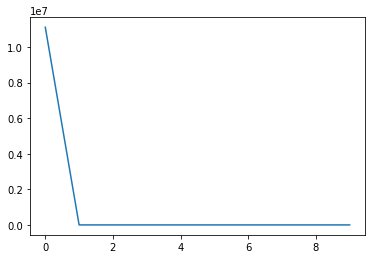

In [12]:
# Check results again
meas = filtering.get_measurements()
#plt.plot(np.arange(meas.shape[0]), meas['Homogeneity'])
#plt.show()
plt.plot(meas['Timesteps'], meas['MSE'])
plt.show()

## Further analysis